In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

from os import listdir
import os
import string
import errno
path2= "stopwords.txt"

genres = {}
directory_path = "Gamespot-Cleaned/test/"
review_identification = ":::Review:::"
destination_path  = "Gamespot-Cleaned/Cleaned_Data/" 

break_cond = "-------------------------------------------------"

def get_files(filepath):
    files = []
    files = listdir(filepath)
    return files


def readstopwords():
    list_words = []
    with open(path2, 'r') as f:
            for line in f:
                line= line.strip(" ").strip('\n')
                list_words.append(line)
    return list_words

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
            
def write_data_to_file(_data):
    make_sure_path_exists(destination_path)
    with open(destination_path +  directory_path.rsplit('/')[1] + ".txt",'a')  as thefile:
        thefile.write("\n")
        thefile.write("============")
        thefile.write("\n")
        for item in _data:
            thefile.write(item)


def _read_genres_from_files(filepath):
    files = get_files(filepath)
    for f in files:
        #print("starting with : ", filepath + "/"+f)
        with open(filepath + "/"+f,'r') as theFile :
            for line in theFile:
                if "Genre" in line:
                    genre =(line.split(':')[1].strip())
                    if genre in genres:
                        genres[genre] += 1
                    else:
                        genres[genre] = 0
                        genres[genre] += 1
                    break
            theFile.close()
        
    
def _get_genres():
    folders = get_files(directory_path)
    for folder in folders:
        _read_genres_from_files(directory_path + folder)
    print(genres)

_get_genres()

    


{'Billiards': 2, 'Fantasy Action Adventure': 45, 'Business Strategy': 3, 'Bowling': 2, 'Real-Time Strategy': 7, 'Olympic Sports': 9, 'Mission-based Driving': 9, 'Ice Hockey': 3, 'Historic Shooter': 2, 'Surfing': 4, 'Baseball Sim': 12, 'Baseball': 7, 'WWII Flight Sim': 7, 'Cricket': 1, 'Football': 6, 'Modern Tactical Shooter': 11, 'Fantasy First-Person...': 3, 'Basketball Sim': 27, 'Formula One Racing': 1, 'Puzzle': 44, 'Modern City-Building': 1, 'Modern First-Person...': 27, 'Stock Car Racing': 4, 'Soccer Management': 3, "Shoot-'Em-Up": 10, '3D Fighting': 26, 'Casino': 5, 'Alt. Sports': 1, '2D Fighting': 8, 'Fantasy Online...': 1, 'Football Sim': 21, 'Fantasy Turn-Based...': 14, 'Rhythm / Music': 37, 'On-foot Racing': 1, 'Historic Real-Time...': 3, 'Music Maker': 1, 'Mech Sim': 7, 'Card Battle': 7, 'Historic Turn-Based...': 6, 'Helicopter Sim': 1, 'Role-Playing': 62, 'Modern Turn-Based...': 2, 'Flight Simulation': 1, 'Skateboarding': 16, 'Stacking Puzzle': 2, 'Futuristic Racing': 1, 'L

In [2]:
from operator import itemgetter

genres_data = {}
top_10_genres = sorted(genres.items(), key=itemgetter(1),reverse=True)[:5]
top_genres = []

for f in top_10_genres:
    top_genres.append(f[0])

print(top_genres)

def read_content(filepath):
    data = ""
    i = 0
    genre  = ""
    with open(filepath, 'r') as f:
            found_genre = False
            found_review = False
            for line in f:
                if "Genre:" in line:
                    genre =(line.split(':')[1].strip())
                    if genre in top_genres:
                        found_genre = True 
                        next(f)
                    else:
                        genre = ""
                        break
                if found_genre :
                    line= line.strip(" ").strip('\n')
                    if review_identification in line:
                        found_review = True
                        line = ""
                        next(f)
                    if found_review :
                        if line.strip() == break_cond:
                            found_review = False
                            break
                        else:
                            line = line.translate(string.punctuation)
                            data += " " + line.lower() + " "
            f.close()
    return data, genre
    
def _get_data_for_genres():
    folders = get_files(directory_path)
    dic_data = {}
    
    for genre in top_genres:
        dic_data[genre] = []
    
    for folder in folders:
        files = get_files(directory_path + folder)
        for f in files:
            output, genre_out = read_content(directory_path + folder + "/" + f)
            if not genre_out == "":
                dic_data[genre_out].append(output)
    return dic_data
genres_data = _get_data_for_genres()            
    
    

['Action', 'Role-Playing', '3D Platformer', 'Adventure', 'Fantasy Action Adventure']


In [15]:
lsa_result = {}
lsa_result_ratio = {}
lsa_result_components = {}


def _perform_Tfidf(docs, stopwords):   
    vectorizer = TfidfVectorizer(stop_words = stopwords,use_idf=True,ngram_range=(1,3),lowercase=False)
    X = vectorizer.fit_transform(docs)
    return X, vectorizer.get_feature_names()

def _perform_LSA(X):
    lsa = TruncatedSVD(n_components=10, n_iter=50)
    lsaOutput = lsa.fit(X)
    return lsaOutput

def _run():
    #files = get_files(directory_path)
    stopwords = readstopwords()
    stopwords.extend(["ll","isn"])
    stopwords = set(stopwords)
    for x in genres_data:
        print(x)
        X, terms = _perform_Tfidf(genres_data[x],stopwords)
        lsa = _perform_LSA(X)
        lsa_result[x] = lsa.explained_variance_
        lsa_result_ratio[x] = lsa.explained_variance_ratio_ 
        lsa_result_components[x] = lsa.components_
        for i,comp in enumerate(lsa.components_[:5]):
            termsInComp = zip(terms,comp)
            sortedTerms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
            print("Concepts " + str(i) + " for genre " + x)
            for term in sortedTerms:
                print(term[0])
            print(" ")
_run()

Action
Concepts 0 for genre Action
game
man
spider
spider man
star wars
wars
lego
star
city
time
 
Concepts 1 for genre Action
lego
lego star
lego star wars
star wars
wars
star
complete saga
saga
played lego
played lego star
 
Concepts 2 for genre Action
lego
madagascar
lego star
lego star wars
africa
julien
melman
star wars
star
durian
 
Concepts 3 for genre Action
spider
spider man
man
spidey
suit
iron man
lego
black
city
swinging
 
Concepts 4 for genre Action
iron man
iron
man
suit
missiles
stark
tony
tony stark
suit power
unibeam
 
3D Platformer
Concepts 0 for genre 3D Platformer
game
spyro
simpsons
spider man
man
spider
time
sonic
simpsons game
just
 
Concepts 1 for genre 3D Platformer
wall
eve
robot
space
game
flying
sections
simpsons
beings
magnetic
 
Concepts 2 for genre 3D Platformer
wall
spyro
eve
cynder
robot
dawn
dawn dragon
dragon
flying
flight
 
Concepts 3 for genre 3D Platformer
spider man
spider
man
missions
city
spidey
new
story
swinging
story missions
 
Concepts 4 for

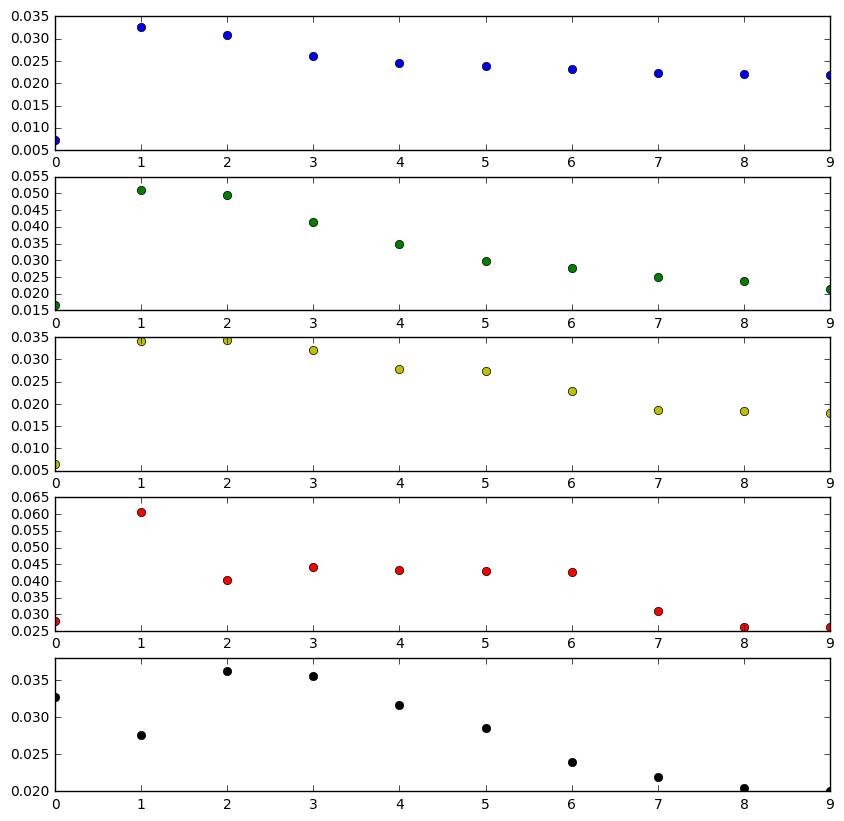

In [17]:
import matplotlib.pyplot as plt

colors = ['bo','go','yo','ro','ko']

rows = len(lsa_result.keys())
colors_gernes = zip(colors,lsa_result.keys())
plt.figure(1, figsize=(10,10))
i = 0
for cg in colors_gernes:
    i +=1
    plt.subplot(rows,1,i)
    plt.plot(lsa_result[cg[1]],cg[0])

plt.show()


In [13]:
cal_ent = lsa_result_components["Fantasy Action Adventure"]
print(cal_ent.shape)
for y in range(0,cal_ent.shape[0]):
    

print(x)    

(10, 52740)
-1.1289331354e-15
